In [1]:
import mitsuba as mi
import drjit as dr

ModuleNotFoundError: No module named 'mitsuba'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mi.set_variant("scalar_rgb")

In [ ]:
scene = mi.load_file("cbox_t/cbox.xml")
image = mi.render(scene, spp=1024)

plt.axis("off")
plt.imshow(image** (1.0 / 2.2))
plt.show()

In [9]:
PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\"
transforms = []
with open(PATH+"records.txt") as f:
    lines = f.readlines()
    for line in lines:
        raw = line.rstrip().split("/")
        single = []
        for t in raw:
            single.append(eval(t))
        transforms.append(single)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


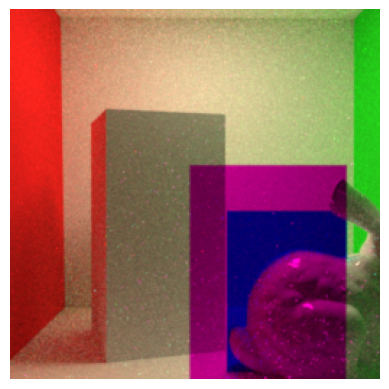

0


In [30]:
rt_images = []
for count in range(len(transforms)):
    scene = mi.load_file("cbox_t/cbox.xml")
    (c,e,l) = transforms[count][0],transforms[count][1],transforms[count][2]
    glass_t = transforms[count][3:]
    params = mi.traverse(scene)
    params['PerspectiveCamera.to_world'] = params['PerspectiveCamera.to_world']@params['PerspectiveCamera.to_world'].translate([c[0],c[1],c[2]])
    params['PerspectiveCamera.to_world'] = params['PerspectiveCamera.to_world']@params['PerspectiveCamera.to_world'].rotate([0,1,0],-e[1])
    params['PerspectiveCamera.to_world'] = params['PerspectiveCamera.to_world']@params['PerspectiveCamera.to_world'].rotate([1,0,0],-e[0])
    V = params['OBJMesh.vertex_positions']
    for i in range(4):
        V[i*3 + 0] += l[0]
        V[i*3 + 1] += l[1]
        V[i*3 + 2] += l[2]
    params['OBJMesh.vertex_positions'] = V
    for glass_id in range(len(glass_t)):
        V = params[f'OBJMesh_{glass_id+1}.vertex_positions']
        g_t = glass_t[glass_id]
        for i in range(4):
            V[i*3 + 0] += g_t[0]
            V[i*3 + 1] += g_t[1]
            V[i*3 + 2] += g_t[2]
        params[f'OBJMesh_{glass_id+1}.vertex_positions'] = V
    params.update()
    image = mi.render(scene, spp=132)
    rt_images.append(image ** (1.0 / 2.2))
    plt.axis("off")
    plt.imshow(image** (1.0 / 2.2))
    plt.show()
    print(count)
    break

(256, 256, 3)


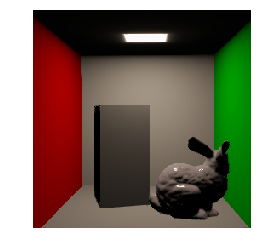

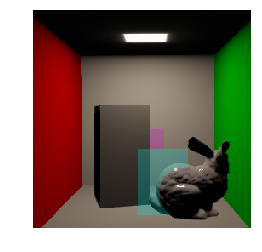

0.24705887 -0.30588236


In [5]:
image_i=50
PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\{image_i}_GD_IMG.array"
PATH2 = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\{image_i}_IMG.array"

x = np.fromfile(PATH2, dtype=np.single).reshape((256,256,4))[:,:,:3]
org = np.fromfile(PATH, dtype=np.single).reshape((256,256,4))[:,:,:3]
plt.axis("off")
print(x.shape)
plt.imshow(np.flipud(x))
plt.show()
plt.axis("off")
plt.imshow(np.flipud(org))
plt.show()
print(np.max(np.flipud(x) - np.flipud(org)),np.min(np.flipud(x) - np.flipud(org)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


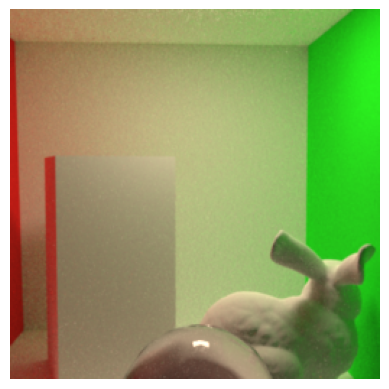

In [84]:
import matplotlib.pyplot as plt
rt_images = np.load("Y.npy")
plt.axis("off")
plt.imshow(rt_images[377])
plt.show()

In [9]:
rt_images_np = np.array(rt_images)
np.save("Y.npy",rt_images_np)

In [13]:
rt_images_np = np.load("Y.npy")

In [23]:
rt_images_delta = []

In [24]:
for image_i in range(len(transforms)):
    img = np.fromfile(PATH+f"{image_i}_IMG.array", dtype=np.single).reshape((256,256,4))
    rt_images_delta.append(rt_images_np[image_i] - np.flipud(img[:,:,:3]))

In [25]:
rt_images_delta_np = np.array(rt_images_delta)
print(rt_images_delta_np.shape)
np.save("Yd.npy",rt_images_delta_np)

(512, 256, 256, 3)


In [59]:
image_i = 200

In [14]:
X = np.zeros((0,256,256,38))
Ytd = np.zeros((0,256,256,3))

In [15]:
import numpy as np

In [ ]:
PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\"
pos_reg_f = 500
for image_i in range(len(transforms)):
    gb_0 = np.fromfile(PATH+f"{image_i}_GBUFFER_0.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    gb_1 = np.fromfile(PATH+f"{image_i}_GBUFFER_1.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    gb_1 /=pos_reg_f
    gb_2 = np.fromfile(PATH+f"{image_i}_GBUFFER_2.array", dtype=np.single).reshape((256,256,4))
    gb_4 = np.fromfile(PATH+f"{image_i}_GBUFFER_4.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    gb_5 = np.fromfile(PATH+f"{image_i}_GBUFFER_5.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    gb_6 = np.fromfile(PATH+f"{image_i}_GBUFFER_6.array", dtype=np.single).reshape((256,256,1))
    
    t1_0 = np.fromfile(PATH+f"{image_i}_T1_GBUFFER_0.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    t2_0 = np.fromfile(PATH+f"{image_i}_T1_GBUFFER_0.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    t1_1 = np.fromfile(PATH+f"{image_i}_T1_GBUFFER_1.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    t1_1 /= pos_reg_f
    t1_1[t1_1 == np.inf] = 0
    t2_1 = np.fromfile(PATH+f"{image_i}_T1_GBUFFER_1.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    t2_1 /= pos_reg_f
    t2_1[t2_1 == np.inf] = 0
    
    t1_2 = np.fromfile(PATH+f"{image_i}_T1_GBUFFER_2.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    t2_2 = np.fromfile(PATH+f"{image_i}_T1_GBUFFER_2.array", dtype=np.single).reshape((256,256,4))[:,:,:3]

    img = np.fromfile(PATH+f"{image_i}_IMG.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    
    img_dt = np.fromfile(PATH+f"{image_i}_IMG.array", dtype=np.single).reshape((256,256,4))[:,:,:3]
    combine = np.concatenate((np.flipud(gb_0),np.flipud(gb_1),
                              np.flipud(gb_2),np.flipud(gb_4),
                              np.flipud(gb_5),np.flipud(gb_6),
                              np.flipud(t1_0),np.flipud(t2_0),
                              np.flipud(t1_1),np.flipud(t2_1),
                              np.flipud(t1_2),np.flipud(t2_2),
                              np.flipud(img))
                             ,axis=2)
    X = np.concatenate((X,combine.reshape(1,256,256,38)))
    Ytd = np.concatenate((Ytd,img_dt.reshape(1,256,256,3)))
    

In [14]:
print(X.shape)
X = np.nan_to_num(X, nan=0, posinf=0, neginf=0)
np.save("X_test.npy",X)

(20, 256, 256, 38)


In [62]:
Y = np.load("Y.npy")

In [61]:
np.save("Y.npy",Y[:-1,...])

In [63]:
print(Y.shape)

(399, 256, 256, 3)


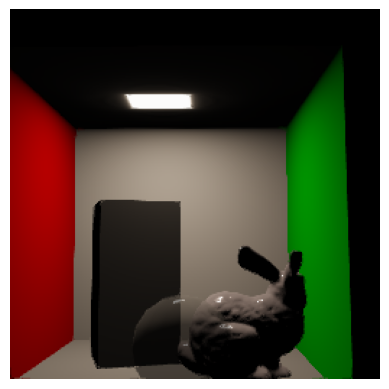

In [59]:
plt.axis("off")
plt.imshow(X[398,:,:,21:24])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


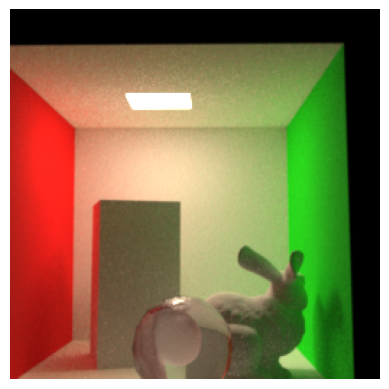

In [57]:
plt.axis("off")
plt.imshow(Y[398])
plt.show()

In [125]:
image_i = 0

In [44]:
x

array([[[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0.

(256, 256, 4)
0.0


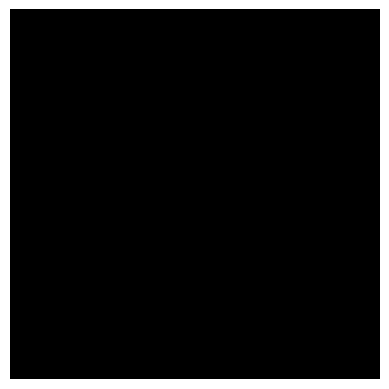

In [24]:

PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\{image_i}_T1_GBUFFER_1.array"
x = np.fromfile(PATH, dtype=np.single).reshape((256,256,4))
print(x.shape)
print(np.min(x))
plt.axis("off")
plt.imshow(np.flipud((x[:,:,:3])))
plt.show()

(256, 256)
1.0


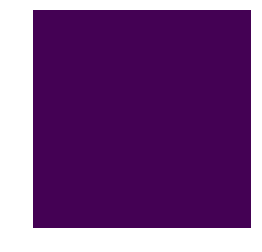

In [66]:
PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\{image_i}_T2_GBUFFER_6.array"
x = np.fromfile(PATH, dtype=np.single).reshape((256,256))
print(x.shape)
print(np.min(x))
plt.axis("off")
plt.imshow(np.flipud((x)))
plt.show()

In [2]:
image_i = 2
PATH = f"C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\{image_i}_GBUFFER_1.array"
x2 = np.fromfile(PATH, dtype=np.single).reshape((256,256,4))
print(x.shape)
plt.imshow(np.flipud((x2[...,:3]/np.max(x2))))

NameError: name 'x' is not defined

In [35]:
PATH = "C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\"
x = np.fromfile(PATH, dtype=np.single).reshape((512,512,4))
print(x.shape)
plt.imshow(np.flipud((x[:,:,:3] )))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\xshuj\\Desktop\\Ph.D.Research\\NeuralShader\\NeuralShader\\savedImages\\'

In [6]:
Xt = np.load("X.npy")

In [14]:
np.save("mask.npy",Xt[:,:,:,10])

In [7]:
Xt.shape

(399, 256, 256, 48)

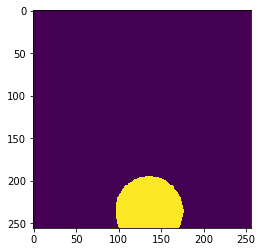

In [12]:
plt.imshow(Xt[1,:,:,10])

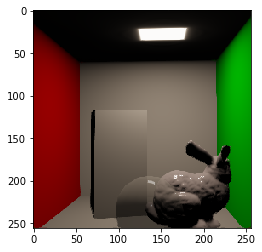

In [13]:
plt.imshow(Xt[1,:,:,21:24])